<img src="images/00-image.png" alt="encoder" class="bg-primary" width="100%">


[Image Reference](https://www.planetware.com/tourist-attractions-/potsdam-d-br-pt.htm)

<h1><center> Introduction To PyTorch <center></h1>

Vision Transformer (ViT) paper: [Paper Reference](https://arxiv.org/abs/2010.11929)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import torch
import torch.nn as nn
from torchinfo import summary

In [3]:
torch.manual_seed(42)
torch.__version__

'2.3.0'

###

## Agnostic Pytorch Code

In [4]:
torch.cuda.is_available()

False

In [5]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

###

## Why use PyTorch?

<img src="images/pytorch_logo2.png" alt="encoder" class="bg-primary" width="500">

- Machine learning researchers tends use PyTorch [most used deep learning framework on Papers With Code](https://paperswithcode.com/trends)

- PyTorch makes use of GPU acceleration

- Pytorch model code are pythonic and usually explicit, thus aid better debugging

###

## Python Functions

In [6]:
class Rectangle:
    
    def __init__(self):
        self.length = 6
        self.width = 4

In [7]:
class Square(Rectangle):

    def __init__(self):
        super().__init__()

    def area(self):
        return self.length * self.width

In [8]:
square = Square()
print(square.area())

24


In [9]:
class Rectangle:

    def __init__(self, con):
        self.length = 6 + con
        self.width = 4

In [10]:
class Square(Rectangle):

    def __init__(self, con):
        super().__init__(con)

    def area(self):
        return self.length*self.width

In [11]:
square = Square(7)
print(square.area())

52


In [12]:
class Cube(Rectangle):

    def __init__(self, height, con): 
        super().__init__(con)
        self.height = height

    def volume(self):
        return self.length*self.width*self.height

In [13]:
cube = Cube(height=3, con=4)
print(cube.volume())

120


###

## PyTorch Models
- Each linear layer has Weight and Biases
- These are the learned parameters

In [14]:
# PyTorch Linear Model
class Linear_Model(nn.Module):

    def __init__(self):
        super().__init__()

        self.linear_layer = nn.Linear(in_features=1, 
                                      out_features=1)
    
    def forward(self, x) -> torch.Tensor:
        return self.linear_layer(x)

## Training Pytorch Models

In [15]:
### Training Loop
def train_loop(model: torch.nn.Module,
               loss_fn: torch.nn.Module, 
               optimizer: torch.optim.Optimizer):
    
    """
    Carries out the training loop.
    """

    # Puts model in training mode (this is the default state of a model)
    model.train()
    
    # 1. Forward pass on train data using the forward() method inside 
    y_pred = model(X_train)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    return loss
    

### Testing Loop
def test_loop(model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              optimizer: torch.optim.Optimizer):

    """
    Carries out the testing loop.
    """

    # Puts the model in evaluation mode
    model.eval()
    
    with torch.inference_mode():
        
        # 1. Forward pass on test data
        test_pred = model(X_test)
        
        # 2. Caculate loss on test data
        test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

        return test_loss

In [16]:
# Data example with 'known' parameters
weight = 0.7
bias = 0.3


X = torch.arange(0, 1, 0.03).unsqueeze(dim=1)
y = weight * X + bias

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

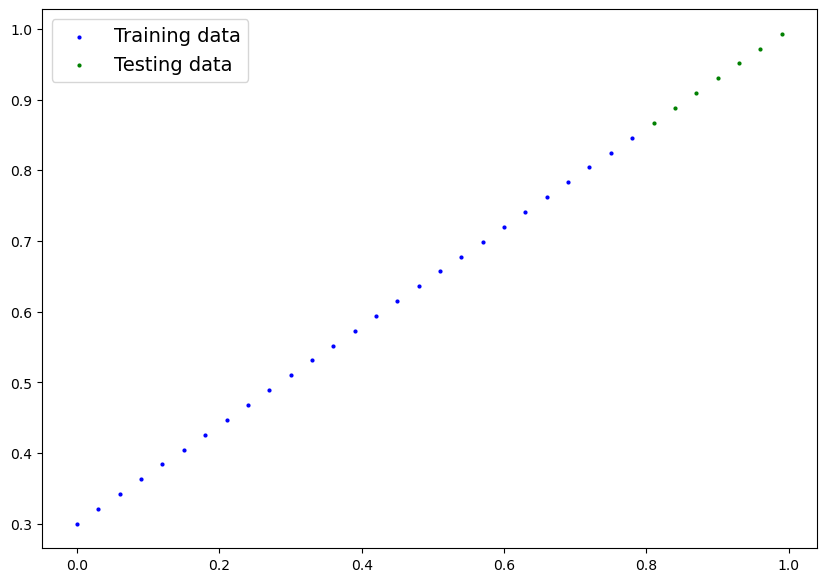

In [17]:
def plots(train_data, train_labels, test_data, test_labels, predictions=None):
    
    """
    Plots training data, test data and compares predictions.
    """
    
    plt.figure(figsize=(10, 7))
    
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
    
    if predictions is not None:

        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    plt.legend(prop={"size": 14});

plots(X_train, y_train, X_test, y_test, predictions=None)

In [18]:
model = Linear_Model()

# Mean Absolute Error loss for evaluation
loss_fn = nn.L1Loss() 

# Optimizes newly created model's parameters
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

In [19]:
summary(model)

Layer (type:depth-idx)                   Param #
Linear_Model                             --
├─Linear: 1-1                            2
Total params: 2
Trainable params: 2
Non-trainable params: 0

In [20]:
# Set the number of epochs (how many times the model will pass over the training data)
epochs = 100

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    train_loss = train_loop(model, loss_fn, optimizer)
    test_loss = train_loop(model, loss_fn, optimizer)
    
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        train_loss_values.append(train_loss.detach().numpy())
        test_loss_values.append(test_loss.detach().numpy())
        print(f"Epoch: {epoch} | MAE Train Loss: {train_loss.detach().numpy():.{6}f} | MAE Test Loss: {test_loss.detach().numpy():.{6}f}")

Epoch: 0 | MAE Train Loss: 0.555178 | MAE Test Loss: 0.543657
Epoch: 10 | MAE Train Loss: 0.324758 | MAE Test Loss: 0.313237
Epoch: 20 | MAE Train Loss: 0.094338 | MAE Test Loss: 0.082817
Epoch: 30 | MAE Train Loss: 0.020132 | MAE Test Loss: 0.019771
Epoch: 40 | MAE Train Loss: 0.013090 | MAE Test Loss: 0.012754
Epoch: 50 | MAE Train Loss: 0.006073 | MAE Test Loss: 0.005712
Epoch: 60 | MAE Train Loss: 0.002944 | MAE Test Loss: 0.008577
Epoch: 70 | MAE Train Loss: 0.002944 | MAE Test Loss: 0.008577
Epoch: 80 | MAE Train Loss: 0.002944 | MAE Test Loss: 0.008577
Epoch: 90 | MAE Train Loss: 0.002944 | MAE Test Loss: 0.008577


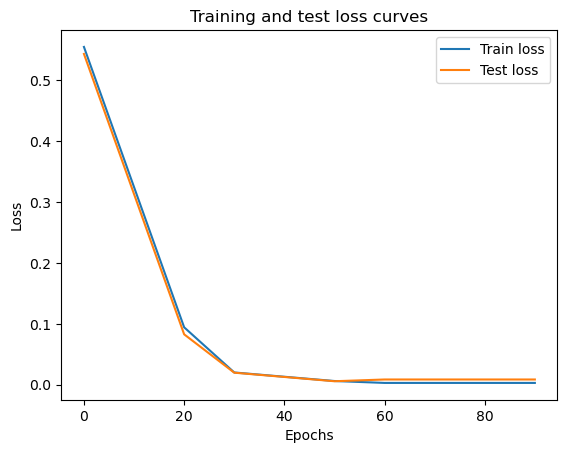

In [21]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

###

## Predicting from Pytorch Models

In [22]:
model.eval()

with torch.inference_mode():

  y_preds = model(X_test)

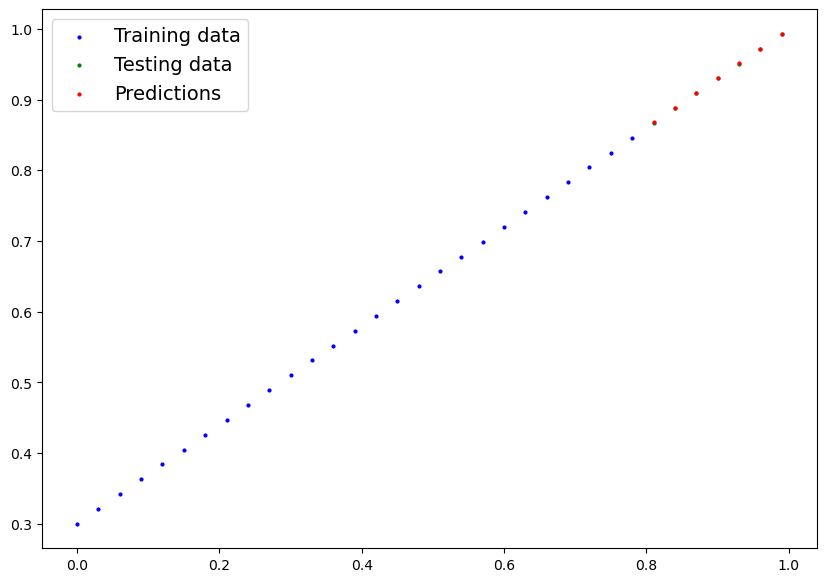

In [23]:
plots(X_train, y_train, X_test, y_test, predictions=y_preds)

In [24]:
from pprint import pprint

pprint(model.state_dict())
print(f"weights: {weight}, bias: {bias}")

OrderedDict([('linear_layer.weight', tensor([[0.6952]])),
             ('linear_layer.bias', tensor([0.3048]))])
weights: 0.7, bias: 0.3


###

## Saving Pytorch Models

In [25]:
# only saving the state_dict() which only saves the models learned parameters
torch.save(obj=model.state_dict(), f="model/linear_model")